In [1]:
#Starter File 

import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from datetime import datetime
from scipy.stats import linregress
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
#Import Data from CSVs

sp_500_div_yield_month = "S&P_500_div_yield_month.csv"
us_yield_curve = "US_Yield_Curve.csv"
sp_500_1m_futures = "S&P_500_1M_Futures.csv"

sp_500_div_yield_month = pd.read_csv(sp_500_div_yield_month)
us_yield_curve = pd.read_csv(us_yield_curve)
sp_500_1m_futures = pd.read_csv(sp_500_1m_futures)

sp_500_div_yield_month_df = pd.DataFrame(sp_500_div_yield_month)
us_yield_curve_df = pd.DataFrame(us_yield_curve)
sp_500_1m_futures_df = pd.DataFrame(sp_500_1m_futures)

print(sp_500_div_yield_month_df.shape)
print(us_yield_curve_df.shape)
print(sp_500_1m_futures_df.shape)

sp_500_1m_futures_df.head(5)

(1792, 2)
(7560, 13)
(9545, 9)


,Date,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
0,3/19/2020,NaN,NaN,NaN,NaN,10.7,2403.3,4764,108057
1,3/18/2020,NaN,NaN,NaN,NaN,81.5,2414.0,5300,108108
2,3/17/2020,NaN,NaN,NaN,NaN,79.3,2495.5,10460,109967
3,3/16/2020,NaN,NaN,NaN,NaN,279.7,2416.2,10105,107994
4,3/13/2020,2614.0,2703.0,2490.0,2695.0,227.0,2695.9,13217,107183


In [3]:
#Merge the Data using Outer method

sp_500_futures_vs_div_df = pd.merge(sp_500_1m_futures, sp_500_div_yield_month, on="Date", how="outer")
sp_500_futures_vs_div_df = pd.merge(sp_500_futures_vs_div_df, us_yield_curve_df, on="Date", how="outer")


sp_500_futures_vs_div_df = pd.DataFrame({
    "Date": sp_500_futures_vs_div_df["Date"],
    "S&P 500 Close Price": sp_500_futures_vs_div_df["Last"],
    "S&P 500 Dividend Yield": sp_500_futures_vs_div_df["Value"],
    "2-Yr Treasury Yield": sp_500_futures_vs_div_df["2 YR"],
    "10-Yr Treasury Yield": sp_500_futures_vs_div_df["10 YR"],
    "10Yr - 2Yr Treasury Yield": sp_500_futures_vs_div_df["10 YR"] - sp_500_futures_vs_div_df["2 YR"]
})

print(sp_500_futures_vs_div_df.shape)
sp_500_futures_vs_div_df.head(5)

(11043, 6)


,Date,S&P 500 Close Price,S&P 500 Dividend Yield,2-Yr Treasury Yield,10-Yr Treasury Yield,10Yr - 2Yr Treasury Yield
0,3/19/2020,NaN,NaN,0.44,1.12,0.68
1,3/18/2020,NaN,NaN,0.54,1.18,0.64
2,3/17/2020,NaN,NaN,0.47,1.02,0.55
3,3/16/2020,NaN,NaN,0.36,0.73,0.37
4,3/13/2020,2695.0,NaN,0.49,0.94,0.45


In [4]:
#Sort the Data by Index

sp_500_futures_vs_div_df_sorted = sp_500_futures_vs_div_df.sort_index(axis=0,ascending=False)
sp_500_futures_vs_div_df_sorted.head(5)

,Date,S&P 500 Close Price,S&P 500 Dividend Yield,2-Yr Treasury Yield,10-Yr Treasury Yield,10Yr - 2Yr Treasury Yield
11042,9/1/1993,NaN,NaN,3.88,5.46,1.58
11041,4/5/1996,NaN,NaN,6.09,6.57,0.48
11040,4/2/1999,NaN,NaN,4.96,5.20,0.24
11039,9/13/2001,NaN,NaN,2.99,4.64,1.65
11038,9/14/2001,NaN,NaN,2.87,4.57,1.70


In [5]:
sp_500_futures_vs_div_df_sorted.dtypes

Date                          object
S&P 500 Close Price          float64
S&P 500 Dividend Yield       float64
2-Yr Treasury Yield          float64
10-Yr Treasury Yield         float64
10Yr - 2Yr Treasury Yield    float64
dtype: object

In [6]:
#Change Date type to "datetime" for further sorting by date range

sp_500_futures_vs_div_df_sorted["Date"] = pd.to_datetime(sp_500_futures_vs_div_df_sorted["Date"])
sp_500_futures_vs_div_df_sorted.dtypes

Date                         datetime64[ns]
S&P 500 Close Price                 float64
S&P 500 Dividend Yield              float64
2-Yr Treasury Yield                 float64
10-Yr Treasury Yield                float64
10Yr - 2Yr Treasury Yield           float64
dtype: object

In [7]:
#Cleaning data to start at earliest common start date for calculations

sp_500_futures_vs_div_df_sorted = sp_500_futures_vs_div_df_sorted[sp_500_futures_vs_div_df_sorted["S&P 500 Close Price"].notna()]
column_value = sp_500_futures_vs_div_df_sorted[sp_500_futures_vs_div_df_sorted["Date"] < "1990-01-31"].index
sp_500_futures_vs_div_df_sorted.drop(column_value, inplace=True)
sp_500_futures_vs_div_df_sorted.head(5)

,Date,S&P 500 Close Price,S&P 500 Dividend Yield,2-Yr Treasury Yield,10-Yr Treasury Yield,10Yr - 2Yr Treasury Yield
7576,1990-01-31,330.50,3.28,8.28,8.43,0.15
7575,1990-02-01,330.10,NaN,8.28,8.42,0.14
7574,1990-02-02,332.50,NaN,8.37,8.50,0.13
7573,1990-02-05,333.40,NaN,8.37,8.53,0.16
7572,1990-02-06,330.25,NaN,8.42,8.57,0.15


In [8]:
#Calculate Daily Dividend Yield from the monthly value

total_yield_list = []
dollar_yield_list = []

for index, row in sp_500_futures_vs_div_df_sorted.iterrows():
    price_row = row["S&P 500 Close Price"]
    yield_row = row["S&P 500 Dividend Yield"]
    if yield_row > 0:
        total_yield_list.append(round(yield_row, 2))
        current_yield = yield_row
        dollar_yield = (current_yield / 100) * price_row
        dollar_yield_list.append(round(dollar_yield, 2))
    else:
        percent_yield = dollar_yield / price_row *100
        total_yield_list.append(round(percent_yield, 2))
    
print(len(total_yield_list))   

7563


In [9]:
#Calculate daily percent returns

sp_500_futures_vs_div_df_sorted["S&P 500 Dividend Yield"] = total_yield_list

sp500_percent_return = []
sp500_div_yield_return = []
treas_10yr_yield_return = []
treas_2yr_yield_return = []
treas_10yr2yr_yield_return = []

previous_price = 325.20
previous_div_yield = 3.28
previous_10yr_treas_yield = 8.51
previous_2yr_treas_yield = 8.30
previous_10yr2yr_treas_yield = 0.21

for index, row in sp_500_futures_vs_div_df_sorted.iterrows():
    price_row = row["S&P 500 Close Price"]
    div_yield_row = row["S&P 500 Dividend Yield"]
    treas_10yr_yield_row = row["10-Yr Treasury Yield"]
    treas_2yr_yield_row = row["2-Yr Treasury Yield"]
    treas_10yr2yr_yield_row = row["10Yr - 2Yr Treasury Yield"]
    
    
    daily_return_sp500 = (price_row - previous_price) / previous_price * 100
    sp500_percent_return.append(round(daily_return_sp500, 2))
    previous_price = price_row
    
    daily_return_div_yield = (div_yield_row - previous_div_yield) / previous_div_yield * 100
    sp500_div_yield_return.append(round(daily_return_div_yield, 2))
    previous_div_yield = div_yield_row
    
    daily_return_treas_10yr_yield = (treas_10yr_yield_row - previous_10yr_treas_yield) / previous_10yr_treas_yield * 100
    treas_10yr_yield_return.append(round(daily_return_treas_10yr_yield, 2))
    previous_10yr_treas_yield = treas_10yr_yield_row
    
    daily_return_treas_2yr_yield = (treas_2yr_yield_row - previous_2yr_treas_yield) / previous_2yr_treas_yield * 100
    treas_2yr_yield_return.append(round(daily_return_treas_2yr_yield, 2))
    previous_2yr_treas_yield = treas_2yr_yield_row
    
    daily_return_treas_10yr2yr_yield = (treas_10yr2yr_yield_row - previous_10yr2yr_treas_yield) / previous_10yr2yr_treas_yield * 100
    treas_10yr2yr_yield_return.append(round(daily_return_treas_10yr2yr_yield, 2))
    if treas_10yr2yr_yield_row == 0:
        previous_10yr2yr_treas_yield = 0.00000000000000000001
    else:
        previous_10yr2yr_treas_yield = treas_10yr2yr_yield_row


print(len(sp500_percent_return))
print(len(sp500_div_yield_return))
print(len(treas_10yr_yield_return))
print(len(treas_2yr_yield_return))
print(len(treas_10yr2yr_yield_return))

7563
7563
7563
7563
7563


In [10]:
#Insert daily percent returns into dataframe

sp_500_futures_vs_div_df_sorted["S&P 500 Dividend Yield"] = total_yield_list

sp_500_futures_vs_div_df_sorted.insert(2, "S&P 500 % Return", sp500_percent_return)
sp_500_futures_vs_div_df_sorted.insert(4, "Div Yield % Return", sp500_div_yield_return)
sp_500_futures_vs_div_df_sorted.insert(6, "2-Yr Treasury Yield % Return", treas_2yr_yield_return)
sp_500_futures_vs_div_df_sorted.insert(8, "10-Yr Treasury Yield % Return", treas_10yr_yield_return)

sp_500_futures_vs_div_df_sorted["10Yr - 2Yr Treasury % Return"] = treas_10yr2yr_yield_return

sp_500_futures_vs_div_df_sorted.head(5)

,Date,S&P 500 Close Price,S&P 500 % Return,S&P 500 Dividend Yield,Div Yield % Return,2-Yr Treasury Yield,2-Yr Treasury Yield % Return,10-Yr Treasury Yield,10-Yr Treasury Yield % Return,10Yr - 2Yr Treasury Yield,10Yr - 2Yr Treasury % Return
7576,1990-01-31,330.50,1.63,3.28,0.00,8.28,-0.24,8.43,-0.94,0.15,-28.57
7575,1990-02-01,330.10,-0.12,3.28,0.00,8.28,0.00,8.42,-0.12,0.14,-6.67
7574,1990-02-02,332.50,0.73,3.26,-0.61,8.37,1.09,8.50,0.95,0.13,-7.14
7573,1990-02-05,333.40,0.27,3.25,-0.31,8.37,0.00,8.53,0.35,0.16,23.08
7572,1990-02-06,330.25,-0.94,3.28,0.92,8.42,0.60,8.57,0.47,0.15,-6.25


In [11]:
#Check for NaN values, and shape of dataframe

print(sp_500_futures_vs_div_df_sorted.isnull().sum())
print(sp_500_futures_vs_div_df_sorted.shape)


Date                               0
S&P 500 Close Price                0
S&P 500 % Return                   0
S&P 500 Dividend Yield             0
Div Yield % Return                 0
2-Yr Treasury Yield               64
2-Yr Treasury Yield % Return     128
10-Yr Treasury Yield              64
10-Yr Treasury Yield % Return    128
10Yr - 2Yr Treasury Yield         64
10Yr - 2Yr Treasury % Return     128
dtype: int64
(7563, 11)


In [12]:
#Drop NaN rows from dataframe

sp_500_futures_vs_div_df_sorted.dropna(inplace=True)
print(sp_500_futures_vs_div_df_sorted.isnull().sum())
print(sp_500_futures_vs_div_df_sorted.shape)


Date                             0
S&P 500 Close Price              0
S&P 500 % Return                 0
S&P 500 Dividend Yield           0
Div Yield % Return               0
2-Yr Treasury Yield              0
2-Yr Treasury Yield % Return     0
10-Yr Treasury Yield             0
10-Yr Treasury Yield % Return    0
10Yr - 2Yr Treasury Yield        0
10Yr - 2Yr Treasury % Return     0
dtype: int64
(7435, 11)


In [13]:
#Sort Dataframe by date range

analyze_dates_df = sp_500_futures_vs_div_df_sorted.loc[(sp_500_futures_vs_div_df_sorted["Date"] >= "1990-01-31") 
                                               & (sp_500_futures_vs_div_df_sorted["Date"] <= "2020-03-20")]
analyze_dates_df.head(5)

,Date,S&P 500 Close Price,S&P 500 % Return,S&P 500 Dividend Yield,Div Yield % Return,2-Yr Treasury Yield,2-Yr Treasury Yield % Return,10-Yr Treasury Yield,10-Yr Treasury Yield % Return,10Yr - 2Yr Treasury Yield,10Yr - 2Yr Treasury % Return
7576,1990-01-31,330.50,1.63,3.28,0.00,8.28,-0.24,8.43,-0.94,0.15,-28.57
7575,1990-02-01,330.10,-0.12,3.28,0.00,8.28,0.00,8.42,-0.12,0.14,-6.67
7574,1990-02-02,332.50,0.73,3.26,-0.61,8.37,1.09,8.50,0.95,0.13,-7.14
7573,1990-02-05,333.40,0.27,3.25,-0.31,8.37,0.00,8.53,0.35,0.16,23.08
7572,1990-02-06,330.25,-0.94,3.28,0.92,8.42,0.60,8.57,0.47,0.15,-6.25


In [14]:
#Calculate total returns for date range

sp500_tot_ret = []
sp500_divyld_tot_ret = []
treas_10yr_yld_tot_ret = []
treas_2yr_yld_tot_ret = []
treas_10yr2yr_yld_tot_ret = []
divyld_less_10yr_treas_tot_ret = []
divyld_less_2yr_treas_tot_ret = []
divyld_less_10yr2yr_treas_tot_ret = []


start_price = analyze_dates_df["S&P 500 Close Price"].iloc[0]
start_div_yield = analyze_dates_df["S&P 500 Dividend Yield"].iloc[0]
start_10yr_treas_yield = analyze_dates_df["10-Yr Treasury Yield"].iloc[0]
start_2yr_treas_yield = analyze_dates_df["2-Yr Treasury Yield"].iloc[0]
start_10yr2yr_treas_yield = analyze_dates_df["10Yr - 2Yr Treasury Yield"].iloc[0]

for index, row in analyze_dates_df.iterrows():
    price_row = row["S&P 500 Close Price"]
    div_yield_row = row["S&P 500 Dividend Yield"]
    treas_10yr_yield_row = row["10-Yr Treasury Yield"]
    treas_2yr_yield_row = row["2-Yr Treasury Yield"]
    treas_10yr2yr_yield_row = row["10Yr - 2Yr Treasury Yield"]
    
    
    tot_ret_sp500 = (price_row - start_price) / start_price * 100
    sp500_tot_ret.append(round(tot_ret_sp500, 2))
    
    tot_ret_div_yld = (div_yield_row - start_div_yield) / start_div_yield * 100
    sp500_divyld_tot_ret.append(round(tot_ret_div_yld, 2))
    
    tot_ret_10yr_treas_yield = (treas_10yr_yield_row - start_10yr_treas_yield) / start_10yr_treas_yield * 100
    treas_10yr_yld_tot_ret.append(round(tot_ret_10yr_treas_yield, 2))
    
    tot_ret_2yr_treas_yield = (treas_2yr_yield_row - start_2yr_treas_yield) / start_2yr_treas_yield * 100
    treas_2yr_yld_tot_ret.append(round(tot_ret_2yr_treas_yield, 2))
    
    tot_ret_10yr2yr_treas_yield = (treas_10yr2yr_yield_row - start_10yr2yr_treas_yield) / start_10yr2yr_treas_yield * 100
    treas_10yr2yr_yld_tot_ret.append(round(tot_ret_10yr2yr_treas_yield, 2))
    
    divyld_less_10yr_treas = tot_ret_div_yld - tot_ret_10yr_treas_yield
    divyld_less_10yr_treas_tot_ret.append(round(divyld_less_10yr_treas, 2))
    
    divyld_less_2yr_treas = tot_ret_div_yld - tot_ret_2yr_treas_yield
    divyld_less_2yr_treas_tot_ret.append(round(divyld_less_2yr_treas, 2))
    
    divyld_less_10yr2yr_treas = tot_ret_div_yld - tot_ret_10yr2yr_treas_yield
    divyld_less_10yr2yr_treas_tot_ret.append(round(divyld_less_10yr2yr_treas, 2))
    

print(start_price)
print(start_div_yield)
print(start_10yr_treas_yield)
print(start_2yr_treas_yield)
print(start_10yr2yr_treas_yield)
analyze_dates_df.head(1)

330.5
3.28
8.43
8.28
0.15000000000000036


,Date,S&P 500 Close Price,S&P 500 % Return,S&P 500 Dividend Yield,Div Yield % Return,2-Yr Treasury Yield,2-Yr Treasury Yield % Return,10-Yr Treasury Yield,10-Yr Treasury Yield % Return,10Yr - 2Yr Treasury Yield,10Yr - 2Yr Treasury % Return
7576,1990-01-31,330.5,1.63,3.28,0.0,8.28,-0.24,8.43,-0.94,0.15,-28.57


In [15]:
#Create Master Dataframe for Charts

analyze_metrics_df = pd.DataFrame({
    "Date": analyze_dates_df["Date"],
    "S&P Price": analyze_dates_df["S&P 500 Close Price"],
    "S&P Div Yld": analyze_dates_df["S&P 500 Dividend Yield"],
    "2Yr Treas Yld": analyze_dates_df["2-Yr Treasury Yield"],
    "10Yr Treas Yld": analyze_dates_df["10-Yr Treasury Yield"],
    #"10Yr2Yr Treas Yld": analyze_dates_df["10-Yr Treasury Yield"] - analyze_dates_df["2-Yr Treasury Yield"],
    #"Div Yld - 2Yr Treas Yld": analyze_dates_df["S&P 500 Dividend Yield"] - analyze_dates_df["2-Yr Treasury Yield"],
    #"Div Yld - 10Yr Treas Yld": analyze_dates_df["S&P 500 Dividend Yield"] - analyze_dates_df["10-Yr Treasury Yield"],
    #"Div Yld - 10Yr2Yr Treas Yld": analyze_dates_df["S&P 500 Dividend Yield"] - analyze_dates_df["10Yr - 2Yr Treasury Yield"],
    "Div Yld / 10Yr2Yr Treas Yld": analyze_dates_df["S&P 500 Dividend Yield"] / analyze_dates_df["10Yr - 2Yr Treasury Yield"],
    "S&P Tot Ret": sp500_tot_ret,
    #"S&P Div Yld Tot Ret": sp500_divyld_tot_ret,
    "2Yr Treas Yld Tot Ret": treas_2yr_yld_tot_ret,
    "10Yr Treas Yld Tot Ret": treas_10yr_yld_tot_ret,
    #"10Yr2Yr Treas Yld Tot Ret": treas_10yr2yr_yld_tot_ret,
    #"Div Yld Tot Ret - 2Yr Treas Yld Tot Ret": divyld_less_2yr_treas_tot_ret,
    #"Div Yld Tot Ret - 10Yr Treas Yld Tot Ret": divyld_less_10yr_treas_tot_ret,
    #"Div Yld Tot Ret - 10Yr2Yr Treas Yld Tot Ret": divyld_less_10yr2yr_treas_tot_ret,
    "S&P Daily Ret": analyze_dates_df["S&P 500 % Return"],
    "S&P Div Yld Daily Ret": analyze_dates_df["Div Yield % Return"],
    #"2Yr Treas Yld Daily Ret": analyze_dates_df["2-Yr Treasury Yield % Return"],
    "10Yr Treas Yld Daily Ret": analyze_dates_df["10-Yr Treasury Yield % Return"],
    "10Yr2Yr Treas Yld Daily Ret": analyze_dates_df["10Yr - 2Yr Treasury % Return"],    
    #"Div Yld Daily Ret - 2Yr Treas Yld Daily Ret": analyze_dates_df["Div Yield % Return"] - analyze_dates_df["2-Yr Treasury Yield % Return"],
    #"Div Yld Daily Ret - 10Yr Treas Yld Daily Ret": analyze_dates_df["Div Yield % Return"] - analyze_dates_df["10-Yr Treasury Yield % Return"],
    #"Div Yld Daily Ret - 10Yr2YrTreas Yld Daily Ret": analyze_dates_df["Div Yield % Return"] - analyze_dates_df["10Yr - 2Yr Treasury % Return"]
})

analyze_metrics_df = analyze_metrics_df.replace([np.inf, -np.inf], np.nan)

print(analyze_metrics_df.isnull().sum())
analyze_metrics_df.dropna(inplace=True)
print(analyze_metrics_df.isnull().sum())
print(analyze_metrics_df.shape)
analyze_metrics_df.head(2)
#print(analyze_metrics_df.shape)

Date                            0
S&P Price                       0
S&P Div Yld                     0
2Yr Treas Yld                   0
10Yr Treas Yld                  0
Div Yld / 10Yr2Yr Treas Yld    21
S&P Tot Ret                     0
2Yr Treas Yld Tot Ret           0
10Yr Treas Yld Tot Ret          0
S&P Daily Ret                   0
S&P Div Yld Daily Ret           0
10Yr Treas Yld Daily Ret        0
10Yr2Yr Treas Yld Daily Ret     0
dtype: int64
Date                           0
S&P Price                      0
S&P Div Yld                    0
2Yr Treas Yld                  0
10Yr Treas Yld                 0
Div Yld / 10Yr2Yr Treas Yld    0
S&P Tot Ret                    0
2Yr Treas Yld Tot Ret          0
10Yr Treas Yld Tot Ret         0
S&P Daily Ret                  0
S&P Div Yld Daily Ret          0
10Yr Treas Yld Daily Ret       0
10Yr2Yr Treas Yld Daily Ret    0
dtype: int64
(7414, 13)


,Date,S&P Price,S&P Div Yld,2Yr Treas Yld,10Yr Treas Yld,Div Yld / 10Yr2Yr Treas Yld,S&P Tot Ret,2Yr Treas Yld Tot Ret,10Yr Treas Yld Tot Ret,S&P Daily Ret,S&P Div Yld Daily Ret,10Yr Treas Yld Daily Ret,10Yr2Yr Treas Yld Daily Ret
7576,1990-01-31,330.5,3.28,8.28,8.43,21.866667,0.00,0.0,0.00,1.63,0.0,-0.94,-28.57
7575,1990-02-01,330.1,3.28,8.28,8.42,23.428571,-0.12,0.0,-0.12,-0.12,0.0,-0.12,-6.67


C:\Users\garyf\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
C:\Users\garyf\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':


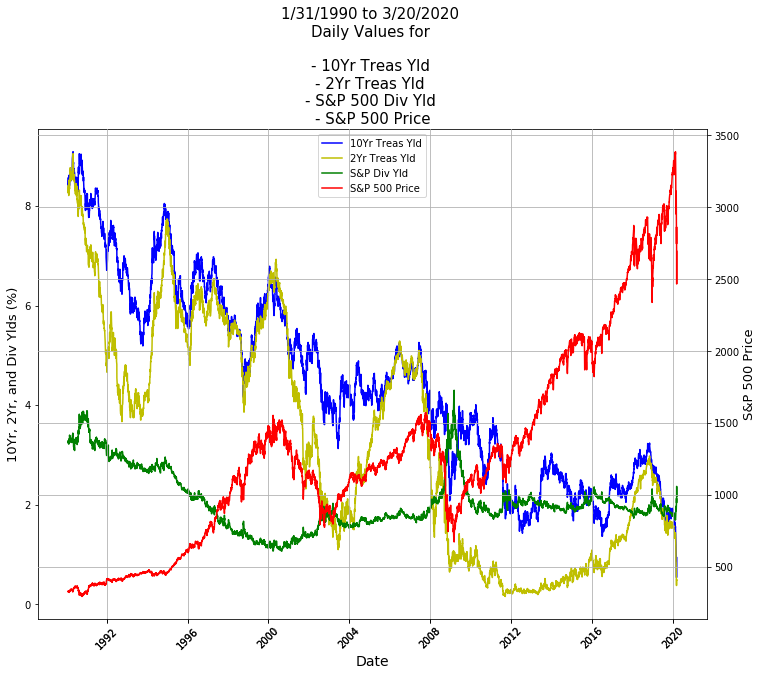

In [16]:
fig1 = plt.figure(figsize=(12,9))

ax1 = fig1.add_subplot(111)
line1 = ax1.plot(analyze_metrics_df["Date"], analyze_metrics_df["10Yr Treas Yld"], "b-")
plt.xticks(rotation=45)
plt.ylabel("10Yr, 2Yr, and Div Ylds (%)", size=13)

ax2 = fig1.add_subplot(111)
line2 = ax2.plot(analyze_metrics_df["Date"], analyze_metrics_df["2Yr Treas Yld"], "y-")
plt.xticks(rotation=45)

ax3 = fig1.add_subplot(111)
line3 = ax3.plot(analyze_metrics_df["Date"], analyze_metrics_df["S&P Div Yld"], "g-")
plt.xticks(rotation=45)

ax4 = fig1.add_subplot(111, sharex=ax1, frameon=False)
line4 = ax4.plot(analyze_metrics_df["Date"], analyze_metrics_df["S&P Price"], "r-")
ax4.yaxis.tick_right()
ax4.yaxis.set_label_position("right")
plt.xticks(rotation=45)
plt.ylabel("S&P 500 Price", size=13)


ax1.legend((line1+line2+line3+line4), ("10Yr Treas Yld", "2Yr Treas Yld", "S&P Div Yld", "S&P 500 Price"), loc="upper center")
plt.title("1/31/1990 to 3/20/2020 \nDaily Values for \n\n- 10Yr Treas Yld \n- 2Yr Treas Yld \n- S&P 500 Div Yld \n- S&P 500 Price", size=15)
plt.xlabel("Date", size=14)
plt.grid(alpha=1)
plt.show()

fig1.tight_layout()
fig1.savefig("fig1-Total Daily Values.png")

In [17]:
def regression_plots(x_axis, y_axis, title, xlabel, ylabel):
    
    correlation = st.pearsonr(x_axis, y_axis)[0]

    #Linear Regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
    
    regress_values = x_axis * slope + intercept
    line_eq = "y = " + str(round(slope,1)) + "x + " + str(round(intercept,1))
    
    plt.scatter(x_axis, y_axis)
    plt.plot(x_axis, regress_values, "r-")
    plt.title(f"{title} \n\n              Linear Regression Equation: {line_eq}\
              \n\nStatistics: \nrvalue = {round(correlation, 2)} \nr-squared = {round(correlation**2, 2)}")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(alpha=0.3)
    plt.show()

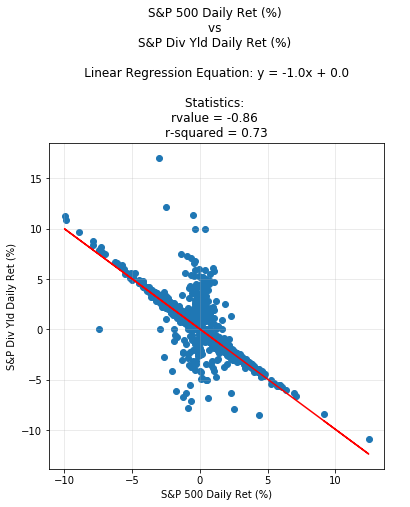

In [18]:
fig2 = plt.figure(figsize=(6,6))
regression_plots(analyze_metrics_df["S&P Daily Ret"], 
                 analyze_metrics_df["S&P Div Yld Daily Ret"],
                 "S&P 500 Daily Ret (%) \nvs \nS&P Div Yld Daily Ret (%)",
                 "S&P 500 Daily Ret (%)",
                 "S&P Div Yld Daily Ret (%)"
                )
fig2.tight_layout()
fig2.savefig("fig2-Daily S&P vs DivYld.png")

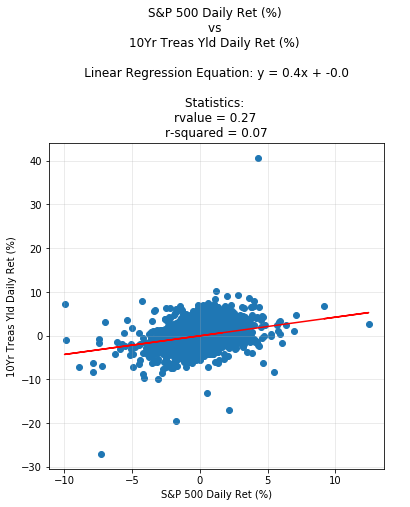

In [19]:
fig3 = plt.figure(figsize=(6,6))
regression_plots(analyze_metrics_df["S&P Daily Ret"], 
                 analyze_metrics_df["10Yr Treas Yld Daily Ret"],
                 "S&P 500 Daily Ret (%) \nvs \n10Yr Treas Yld Daily Ret (%)",
                 "S&P 500 Daily Ret (%)",
                 "10Yr Treas Yld Daily Ret (%)"
                )
fig3.tight_layout()
fig3.savefig("fig3-Daily S&P Ret vs 10Yr Ret.png")

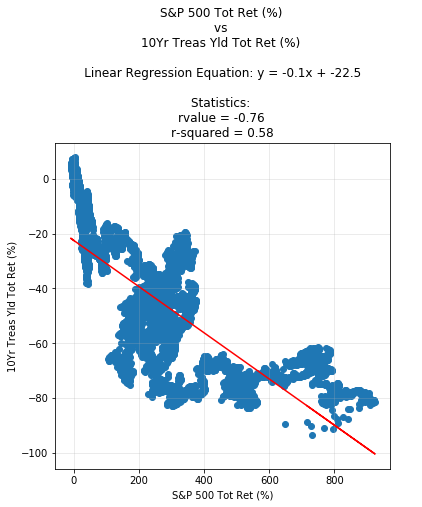

In [20]:
fig4 = plt.figure(figsize=(6,6))
regression_plots(analyze_metrics_df["S&P Tot Ret"], 
                 analyze_metrics_df["10Yr Treas Yld Tot Ret"],
                 "S&P 500 Tot Ret (%) \nvs \n10Yr Treas Yld Tot Ret (%)",
                 "S&P 500 Tot Ret (%)",
                 "10Yr Treas Yld Tot Ret (%)"
                )
fig4.tight_layout()
fig4.savefig("fig4-S&P Tot Ret vs 10Yr Tot Ret.png")

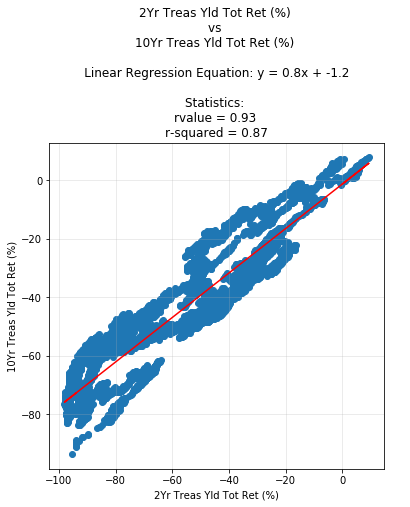

In [21]:
fig5 = plt.figure(figsize=(6,6))
regression_plots(analyze_metrics_df["2Yr Treas Yld Tot Ret"], 
                 analyze_metrics_df["10Yr Treas Yld Tot Ret"],
                 "2Yr Treas Yld Tot Ret (%) \nvs \n10Yr Treas Yld Tot Ret (%)",
                 "2Yr Treas Yld Tot Ret (%)",
                 "10Yr Treas Yld Tot Ret (%)"
                )
fig5.tight_layout()
fig5.savefig("fig5-2Yr Tot Ret vs 10Yr Tot Ret.png")

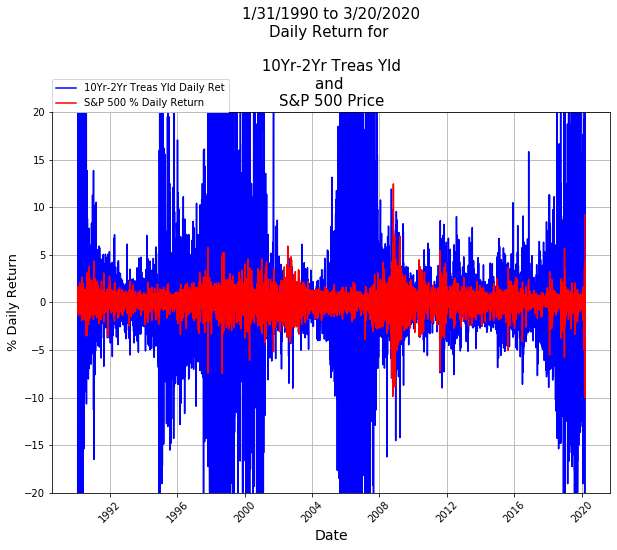

In [22]:
fig6 = plt.figure(figsize=(10,7))

plt.plot(analyze_metrics_df["Date"], analyze_metrics_df["10Yr2Yr Treas Yld Daily Ret"], "b-")
plt.plot(analyze_metrics_df["Date"], analyze_metrics_df["S&P Daily Ret"], "r-")
plt.xticks(rotation=45)
plt.ylabel("% Daily Return", size=13)
plt.ylim(-20,20)
plt.legend((line1+line4), ("10Yr-2Yr Treas Yld Daily Ret", "S&P 500 % Daily Return"), loc=(0,1))
plt.title("1/31/1990 to 3/20/2020\nDaily Return for \n\n 10Yr-2Yr Treas Yld \nand \nS&P 500 Price", size=15)
plt.xlabel("Date", size=14)
plt.grid(alpha=1)
plt.show()

fig6.tight_layout()
fig6.savefig("fig6-Daily Ret 10Yr-2Yr and S&P.png")

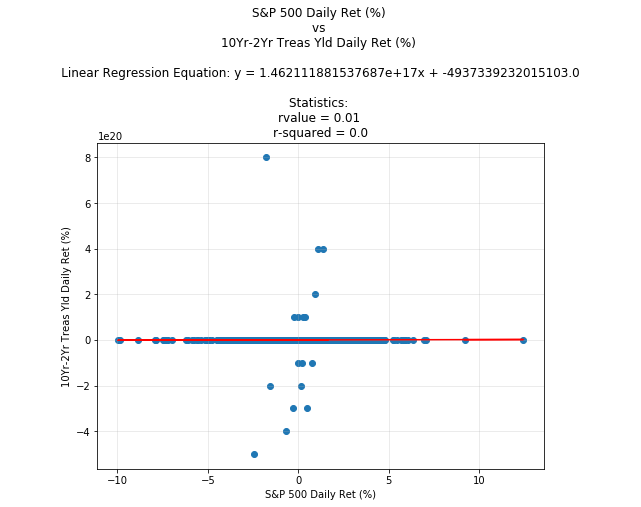

In [23]:
fig7 = plt.figure(figsize=(8,6))
regression_plots(analyze_metrics_df["S&P Daily Ret"], 
                 analyze_metrics_df["10Yr2Yr Treas Yld Daily Ret"],
                 "S&P 500 Daily Ret (%) \nvs \n10Yr-2Yr Treas Yld Daily Ret (%)",
                 "S&P 500 Daily Ret (%)",
                 "10Yr-2Yr Treas Yld Daily Ret (%)"
                )
fig7.tight_layout()
fig7.savefig("fig7-Daily S&P vs 10Yr-2Yr.png")

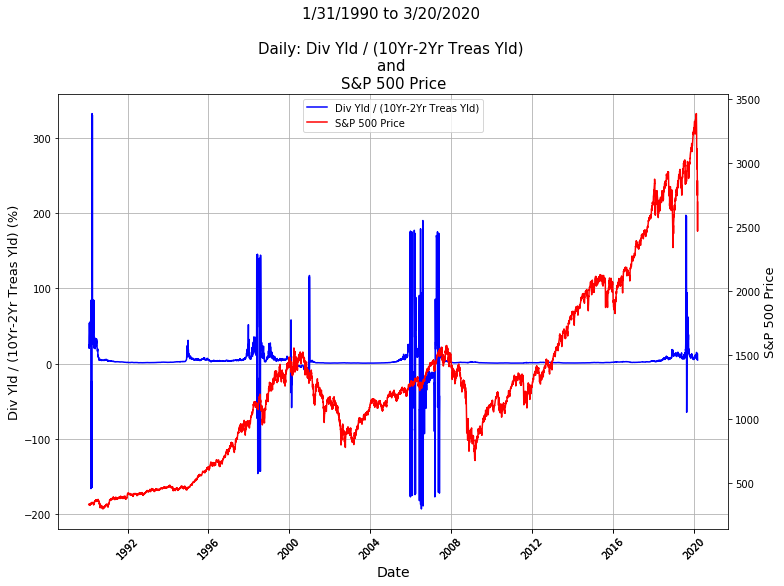

In [24]:
fig8 = plt.figure(figsize=(12, 8))

ax1 = fig8.add_subplot(111)
line1 = ax1.plot(analyze_metrics_df["Date"], analyze_metrics_df["Div Yld / 10Yr2Yr Treas Yld"], "b-")
plt.xticks(rotation=45)
plt.ylabel("Div Yld / (10Yr-2Yr Treas Yld) (%)", size=13)
plt.grid(alpha=1)

ax2 = fig8.add_subplot(111, sharex=ax1, frameon=False)
line2 = ax2.plot(analyze_metrics_df["Date"], analyze_metrics_df["S&P Price"], "r-")
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
plt.xticks(rotation=45)
plt.ylabel("S&P 500 Price", size=13)


ax1.legend((line1+line2), ("Div Yld / (10Yr-2Yr Treas Yld)", "S&P 500 Price"), loc="upper center")
plt.title("1/31/1990 to 3/20/2020 \n\nDaily: Div Yld / (10Yr-2Yr Treas Yld) \nand \nS&P 500 Price", size=15)
plt.xlabel("Date", size=14)

plt.show()

fig8.tight_layout()
fig8.savefig("fig8-1_1990 to 2_2020.png")

In [25]:
#Sort Dataframe by date range
analyze_dates_1_df = sp_500_futures_vs_div_df_sorted.loc[(sp_500_futures_vs_div_df_sorted["Date"] >= "1990-01-31") 
                                               & (sp_500_futures_vs_div_df_sorted["Date"] <= "1991-03-20")]

#Create Dataframe for chart
analyze_metrics_1_df = pd.DataFrame({
    "Date": analyze_dates_1_df["Date"],
    "S&P Price": analyze_dates_1_df["S&P 500 Close Price"],
    "Div Yld / 10Yr2Yr Treas Yld": analyze_dates_1_df["S&P 500 Dividend Yield"] / analyze_dates_1_df["10Yr - 2Yr Treasury Yield"]  
})

analyze_metrics_1_df = analyze_metrics_1_df.replace([np.inf, -np.inf], np.nan)

print(analyze_metrics_1_df.isnull().sum())
analyze_metrics_1_df.dropna(inplace=True)
print(analyze_metrics_1_df.isnull().sum())
print(analyze_metrics_1_df.shape)
analyze_metrics_1_df.head(2)

Date                           0
S&P Price                      0
Div Yld / 10Yr2Yr Treas Yld    0
dtype: int64
Date                           0
S&P Price                      0
Div Yld / 10Yr2Yr Treas Yld    0
dtype: int64
(281, 3)


,Date,S&P Price,Div Yld / 10Yr2Yr Treas Yld
7576,1990-01-31,330.5,21.866667
7575,1990-02-01,330.1,23.428571


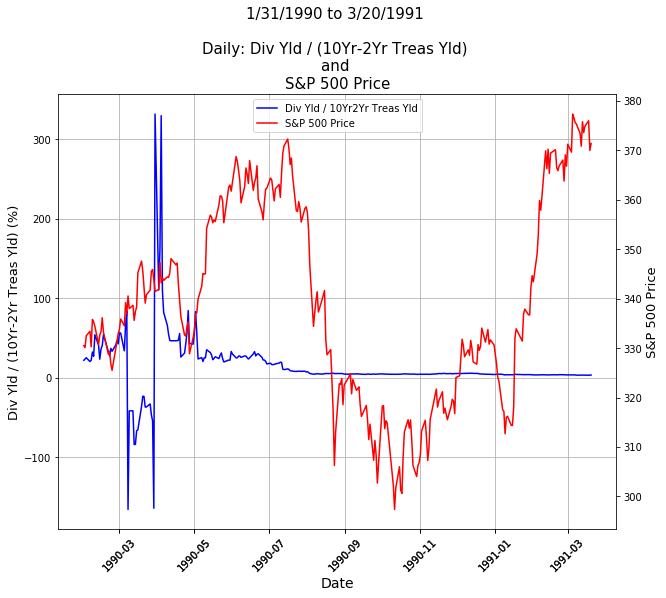

In [26]:
fig9 = plt.figure(figsize=(10, 8))

ax1 = fig9.add_subplot(111)
line1 = ax1.plot(analyze_metrics_1_df["Date"], analyze_metrics_1_df["Div Yld / 10Yr2Yr Treas Yld"], "b-")
plt.xticks(rotation=45)
plt.ylabel("Div Yld / (10Yr-2Yr Treas Yld) (%)", size=13)
plt.grid(alpha=1)

ax2 = fig9.add_subplot(111, sharex=ax1, frameon=False)
line2 = ax2.plot(analyze_metrics_1_df["Date"], analyze_metrics_1_df["S&P Price"], "r-")
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
plt.xticks(rotation=45)
plt.ylabel("S&P 500 Price", size=13)

ax1.legend((line1+line2), ("Div Yld / 10Yr2Yr Treas Yld", "S&P 500 Price"), loc="upper center")
plt.title("1/31/1990 to 3/20/1991 \n\nDaily: Div Yld / (10Yr-2Yr Treas Yld) \nand \nS&P 500 Price", size=15)
plt.xlabel("Date", size=14)

plt.show()

fig9.tight_layout()
fig9.savefig("fig9-1_1990 to 3_1991.png")

In [27]:
#Sort Dataframe by date range
analyze_dates_2_df = sp_500_futures_vs_div_df_sorted.loc[(sp_500_futures_vs_div_df_sorted["Date"] >= "1998-01-31") 
                                               & (sp_500_futures_vs_div_df_sorted["Date"] <= "2002-03-20")]

#Create Dataframe for chart
analyze_metrics_2_df = pd.DataFrame({
    "Date": analyze_dates_2_df["Date"],
    "S&P Price": analyze_dates_2_df["S&P 500 Close Price"],
    "Div Yld / 10Yr2Yr Treas Yld": analyze_dates_2_df["S&P 500 Dividend Yield"] / analyze_dates_2_df["10Yr - 2Yr Treasury Yield"]  
})

analyze_metrics_2_df = analyze_metrics_2_df.replace([np.inf, -np.inf], np.nan)

print(analyze_metrics_2_df.isnull().sum())
analyze_metrics_2_df.dropna(inplace=True)
print(analyze_metrics_2_df.isnull().sum())
print(analyze_metrics_2_df.shape)
analyze_metrics_2_df.head(2)

Date                           0
S&P Price                      0
Div Yld / 10Yr2Yr Treas Yld    6
dtype: int64
Date                           0
S&P Price                      0
Div Yld / 10Yr2Yr Treas Yld    0
dtype: int64
(1018, 3)


,Date,S&P Price,Div Yld / 10Yr2Yr Treas Yld
5554,1998-02-02,1004.0,7.476190
5553,1998-02-03,1010.7,7.090909


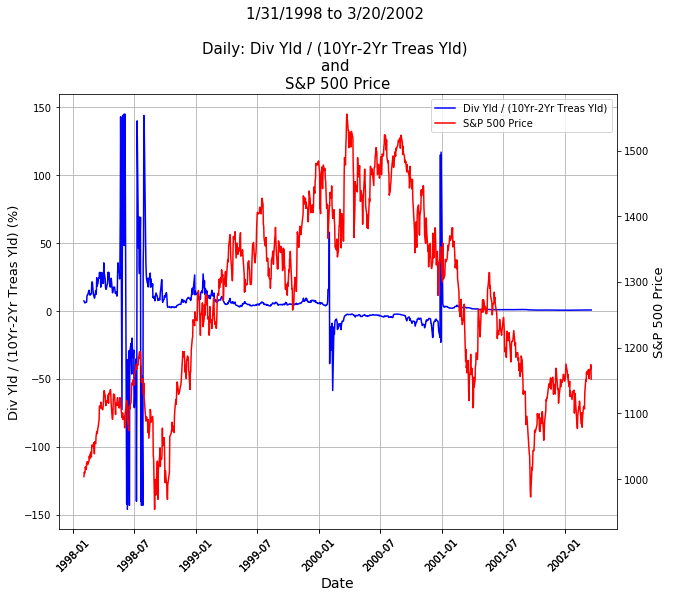

In [28]:
fig10 = plt.figure(figsize=(10, 8))

ax1 = fig10.add_subplot(111)
line1 = ax1.plot(analyze_metrics_2_df["Date"], analyze_metrics_2_df["Div Yld / 10Yr2Yr Treas Yld"], "b-")
plt.xticks(rotation=45)
#plt.ylim(-2.5, 3)
plt.ylabel("Div Yld / (10Yr-2Yr Treas Yld) (%)", size=13)
plt.grid(alpha=1)

ax2 = fig10.add_subplot(111, sharex=ax1, frameon=False)
line2 = ax2.plot(analyze_metrics_2_df["Date"], analyze_metrics_2_df["S&P Price"], "r-")
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
plt.xticks(rotation=45)
plt.ylabel("S&P 500 Price", size=13)

ax1.legend((line1+line2), ("Div Yld / (10Yr-2Yr Treas Yld)", "S&P 500 Price"), loc="upper right")
plt.title("1/31/1998 to 3/20/2002 \n\nDaily: Div Yld / (10Yr-2Yr Treas Yld) \nand \nS&P 500 Price", size=15)
plt.xlabel("Date", size=14)

plt.show()

fig10.tight_layout()
fig10.savefig("fig10-1_1998 to 3_2002.png")

In [29]:
#Sort Dataframe by date range
analyze_dates_3_df = sp_500_futures_vs_div_df_sorted.loc[(sp_500_futures_vs_div_df_sorted["Date"] >= "2005-09-30") 
                                               & (sp_500_futures_vs_div_df_sorted["Date"] <= "2009-03-20")]

#Create Dataframe for chart
analyze_metrics_3_df = pd.DataFrame({
    "Date": analyze_dates_3_df["Date"],
    "S&P Price": analyze_dates_3_df["S&P 500 Close Price"],
    "Div Yld / 10Yr2Yr Treas Yld": analyze_dates_3_df["S&P 500 Dividend Yield"] / analyze_dates_3_df["10Yr - 2Yr Treasury Yield"]  
})

analyze_metrics_3_df = analyze_metrics_3_df.replace([np.inf, -np.inf], np.nan)

print(analyze_metrics_3_df.isnull().sum())
analyze_metrics_3_df.dropna(inplace=True)
print(analyze_metrics_3_df.isnull().sum())
print(analyze_metrics_3_df.shape)
analyze_metrics_3_df.head(2)

Date                            0
S&P Price                       0
Div Yld / 10Yr2Yr Treas Yld    12
dtype: int64
Date                           0
S&P Price                      0
Div Yld / 10Yr2Yr Treas Yld    0
dtype: int64
(838, 3)


,Date,S&P Price,Div Yld / 10Yr2Yr Treas Yld
3626,2005-09-30,1234.3,10.937500
3625,2005-10-03,1231.8,9.722222


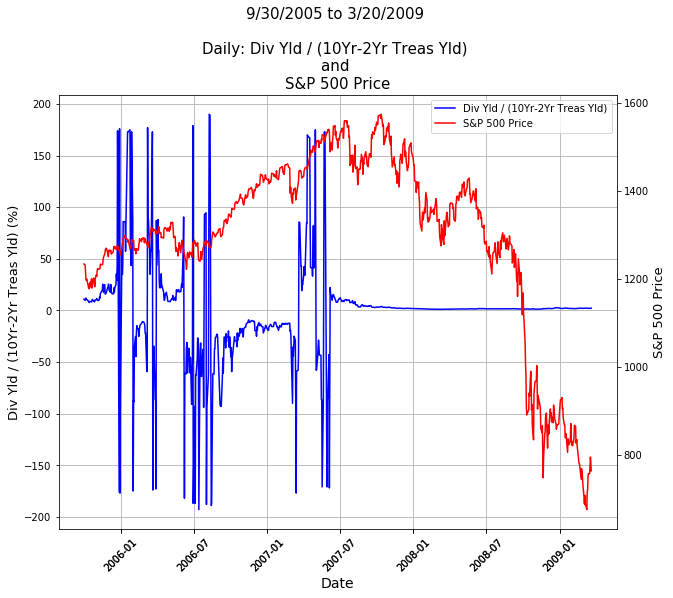

In [30]:
fig11 = plt.figure(figsize=(10, 8))

ax1 = fig11.add_subplot(111)
line1 = ax1.plot(analyze_metrics_3_df["Date"], analyze_metrics_3_df["Div Yld / 10Yr2Yr Treas Yld"], "b-")
plt.xticks(rotation=45)
#plt.ylim(-2.5, 3)
plt.ylabel("Div Yld / (10Yr-2Yr Treas Yld) (%)", size=13)
plt.grid(alpha=1)

ax2 = fig11.add_subplot(111, sharex=ax1, frameon=False)
line2 = ax2.plot(analyze_metrics_3_df["Date"], analyze_metrics_3_df["S&P Price"], "r-")
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
plt.xticks(rotation=45)
plt.ylabel("S&P 500 Price", size=13)

ax1.legend((line1+line2), ("Div Yld / (10Yr-2Yr Treas Yld)", "S&P 500 Price"), loc="upper right")
plt.title("9/30/2005 to 3/20/2009 \n\nDaily: Div Yld / (10Yr-2Yr Treas Yld) \nand \nS&P 500 Price", size=15)
plt.xlabel("Date", size=14)

plt.show()

fig11.tight_layout()
fig11.savefig("fig11-9_2005 to 3_2009.png")

In [31]:
#Sort Dataframe by date range
analyze_dates_4_df = sp_500_futures_vs_div_df_sorted.loc[(sp_500_futures_vs_div_df_sorted["Date"] >= "2017-07-30") 
                                               & (sp_500_futures_vs_div_df_sorted["Date"] <= "2020-03-20")]

#Create Dataframe for chart
analyze_metrics_4_df = pd.DataFrame({
    "Date": analyze_dates_4_df["Date"],
    "S&P Price": analyze_dates_4_df["S&P 500 Close Price"],
    "Div Yld / 10Yr2Yr Treas Yld": analyze_dates_4_df["S&P 500 Dividend Yield"] / analyze_dates_4_df["10Yr - 2Yr Treasury Yield"]  
})

analyze_metrics_4_df = analyze_metrics_4_df.replace([np.inf, -np.inf], np.nan)

print(analyze_metrics_4_df.isnull().sum())
analyze_metrics_4_df.dropna(inplace=True)
print(analyze_metrics_4_df.isnull().sum())
print(analyze_metrics_4_df.shape)
analyze_metrics_4_df.head(2)

Date                           0
S&P Price                      0
Div Yld / 10Yr2Yr Treas Yld    3
dtype: int64
Date                           0
S&P Price                      0
Div Yld / 10Yr2Yr Treas Yld    0
dtype: int64
(640, 3)


,Date,S&P Price,Div Yld / 10Yr2Yr Treas Yld
664,2017-07-31,2469.7,2.020833
663,2017-08-01,2472.8,2.108696


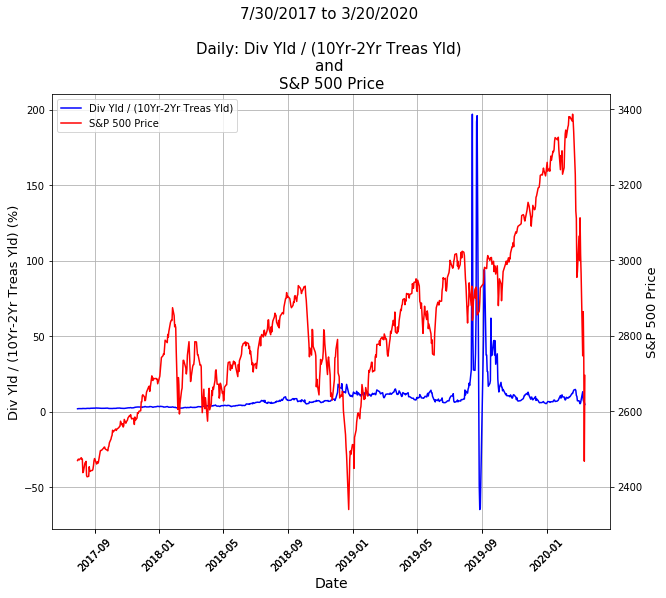

In [32]:
fig12 = plt.figure(figsize=(10, 8))

ax1 = fig12.add_subplot(111)
line1 = ax1.plot(analyze_metrics_4_df["Date"], analyze_metrics_4_df["Div Yld / 10Yr2Yr Treas Yld"], "b-")
plt.xticks(rotation=45)
plt.ylabel("Div Yld / (10Yr-2Yr Treas Yld) (%)", size=13)
plt.grid(alpha=1)

ax2 = fig12.add_subplot(111, sharex=ax1, frameon=False)
line2 = ax2.plot(analyze_metrics_4_df["Date"], analyze_metrics_4_df["S&P Price"], "r-")
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
plt.xticks(rotation=45)
plt.ylabel("S&P 500 Price", size=13)

ax1.legend((line1+line2), ("Div Yld / (10Yr-2Yr Treas Yld)", "S&P 500 Price"), loc="upper left")
plt.title("7/30/2017 to 3/20/2020 \n\nDaily: Div Yld / (10Yr-2Yr Treas Yld) \nand \nS&P 500 Price", size=15)
plt.xlabel("Date", size=14)

plt.show()

fig12.tight_layout()
fig12.savefig("fig12-7_2017 to 3_2020.png")